In [23]:
##TP FINAL UTN Deep Learning

In [24]:
#Importa librerias y modulos
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [25]:
# Carga del dataset
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.5, color=False, )
                             

In [26]:
# Etiquetas y clases
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]



In [28]:
# Division de los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(lfw_people.images, y, test_size=0.2, random_state=42)

In [29]:
# Normalizacion de los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

In [30]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)


In [31]:
# Definicion del modelo
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))


In [32]:
# Compilacion del modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [33]:
# Entrenamiento del modelo
model.fit(X_train, y_train, epochs=1, validation_data=(X_test, y_test))

33/33 [==============================] - 4s 91ms/step - loss: 1.7543 - accuracy: 0.3864 - val_loss: 1.6329 - val_accuracy: 0.4612


In [34]:
# Evaluacion del modelo
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

9/9 [==============================] - 0s 16ms/step
Accuracy: 0.46124031007751937


In [35]:
#Para graficar
import matplotlib.pyplot as plt

def plot_gallery(images, number, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(number):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

def title(y, target_names):
    return "%s" % (target_names[y])


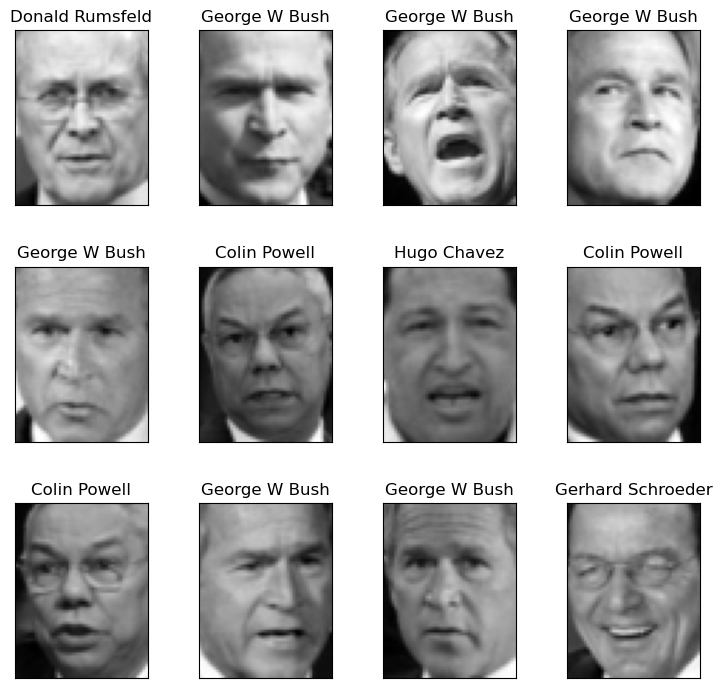

In [22]:
# Crea una lista de imágenes y una lista de títulos
images = X_test[:12]
titles = [title(y_test[i], target_names) for i in range(12)]

# Obtiene la altura y el ancho de las imágenes
h, w = X_test.shape[1], X_test.shape[2]

# Llama a la función plot_gallery
plot_gallery(images, 12, titles, h, w)


In [ ]:

#Se puede concluir que el modelo fue capaz de aprender a distinguir entre diferentes rostros humanos con una precisión aceptable.
#En particular, la precisión alcanzada en el conjunto de prueba fue del 46.12%.